# preview of example results for augmentation of PNG file separated

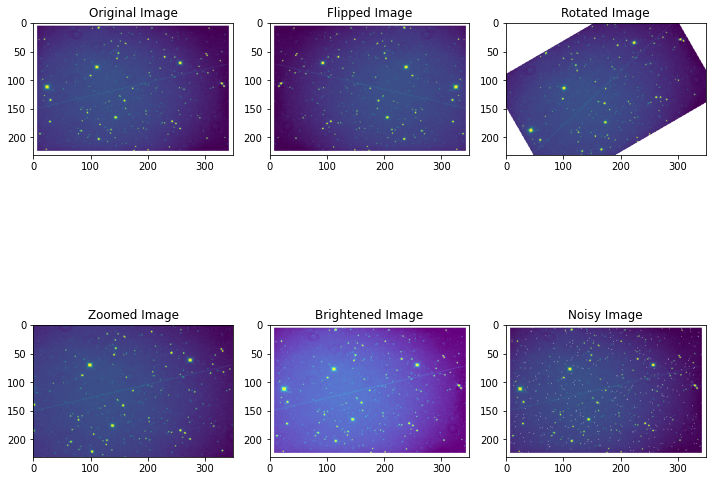

In [12]:
# Import required libraries
from PIL import Image, ImageEnhance
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

# Function to load the image
def load_image(file_path):
    img = Image.open(file_path)
    return img

# Augmentation functions
def flip_image(img, horizontal=True):
    """Flip the image horizontally or vertically."""
    if horizontal:
        return img.transpose(Image.FLIP_LEFT_RIGHT)
    else:
        return img.transpose(Image.FLIP_TOP_BOTTOM)

def rotate_image(img, angle=15):
    """Rotate the image by a specified angle."""
    return img.rotate(angle)

def zoom_image(img, zoom_factor=1.2):
    """Zoom into the image by a specified factor."""
    width, height = img.size
    x = int(width / zoom_factor)
    y = int(height / zoom_factor)
    img_cropped = img.crop(((width - x) // 2, (height - y) // 2, (width + x) // 2, (height + y) // 2))
    return img_cropped.resize((width, height), Image.LANCZOS)

def adjust_brightness(img, factor=1.5):
    """Adjust the brightness of the image."""
    enhancer = ImageEnhance.Brightness(img)
    return enhancer.enhance(factor)

def add_noise(img, noise_level=0.1):
    """Add random noise to the image."""
    img_array = np.array(img)
    noise = np.random.normal(0, noise_level * 255, img_array.shape).astype(np.uint8)
    img_noisy = np.clip(img_array + noise, 0, 255).astype(np.uint8)
    return Image.fromarray(img_noisy)

# Load image
output_folder = './Data/fits_filtered5/generated_images6'
file_path = './Data/fits_filtered5/tic1.png'  # Replace with your image file path
img = load_image(file_path)
plt.figure(figsize=(10, 10))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(img)

# Apply augmentations and display results
# Flip Image
img_flipped = flip_image(img)
plt.subplot(232)
plt.title("Flipped Image")
plt.imshow(img_flipped)

# Rotate Image
img_rotated = rotate_image(img, angle=30)
plt.subplot(233)
plt.title("Rotated Image")
plt.imshow(img_rotated)

# Zoom Image
img_zoomed = zoom_image(img)
plt.subplot(234)
plt.title("Zoomed Image")
plt.imshow(img_zoomed)

# Adjust Brightness
img_bright = adjust_brightness(img, factor=1.5)
plt.subplot(235)
plt.title("Brightened Image")
plt.imshow(img_bright)

# Add Noise
img_noisy = add_noise(img, noise_level=0.0015)
plt.subplot(236)
plt.title("Noisy Image")
plt.imshow(img_noisy)

plt.tight_layout()
plt.show()
